In [4]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


1.11.0
2.1.6-tf


In [5]:
! ls

aa.ipynb		 equipment_success.csv	       mlcc-exercises_en.zip
demo.ipynb		 equipment_success_unique.csv
equipment-success.ipynb  mlcc-exercises


In [65]:
equipment_success_dataframe = pd.read_csv("./equipment_success_unique.csv", sep=",")
equipment_success_dataframe.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,freq_500,freq_1000,freq_2000,freq_4000,eq_freq_1000,eq_freq_2000,eq_freq_4000,eq_freq_500,rk
count,86176.0,86176.0,86176.0,68463.0,86176.0,86176.0,72766.0,86176.0,86176.0,86176.0,71126.0,70508.0,72606.0,71629.0,69986.0,84768.0,84742.0,78864.0,78928.0,86176.0
mean,183134.4,464.7,24.0,56.6,53.4,39.8,34.6,36.9,30.1,1157287.6,838.0,46.7,52.0,60.5,68.3,30.0,34.1,44.3,30.8,1.0
std,61256.1,408.9,30.4,21.0,29.6,28.0,9.5,10.5,11.0,77045.4,219.8,25.1,24.5,22.1,21.1,10.7,11.4,13.9,11.6,0.0
min,51.0,2.0,0.0,-10.0,-9.2,-10.0,-1.2,-10.0,-10.0,1032381.0,0.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,-5.0,1.0
25%,145368.5,96.0,1.0,42.5,41.4,22.5,28.8,30.0,23.3,1093038.0,766.0,30.0,35.0,45.0,55.0,25.0,25.0,35.0,25.0,1.0
50%,185960.0,312.0,12.0,52.5,56.0,36.7,33.8,35.8,30.0,1143304.0,882.0,40.0,49.5,57.0,65.0,30.0,34.0,42.0,30.0,1.0
75%,228606.0,852.0,37.0,65.0,70.0,53.8,38.8,41.7,35.0,1234714.2,974.0,60.0,65.0,70.0,80.0,35.0,40.0,50.0,35.0,1.0
max,288723.0,1390.0,215.0,125.0,125.0,125.0,120.0,120.0,117.5,1285320.0,1559.0,125.0,125.0,125.0,130.0,120.0,120.0,120.0,120.0,1.0


In [66]:
equipment_success_dataframe

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,...,gender,freq_500,freq_1000,freq_2000,freq_4000,eq_freq_1000,eq_freq_2000,eq_freq_4000,eq_freq_500,rk
0,51,14,L,0,nan,70.0,70.0,nan,85.0,85.0,...,NaN,nan,70.0,70.0,70.0,85.0,85.0,nan,nan,1
1,51,14,R,0,nan,55.0,55.0,nan,0.0,70.0,...,NaN,nan,55.0,55.0,nan,nan,nan,nan,70.0,1
2,58,199,L,24,32.5,42.5,13.3,31.2,39.2,16.2,...,male,10.0,15.0,50.0,55.0,20.0,35.0,55.0,15.0,1
3,58,199,R,26,nan,45.0,45.0,41.2,43.0,37.5,...,male,nan,45.0,nan,nan,45.0,40.0,45.0,35.0,1
4,496,27,L,46,61.2,70.0,51.7,36.2,38.8,33.3,...,NaN,60.0,45.0,60.0,80.0,30.0,35.0,50.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86171,288699,466,BIN,52,nan,0.0,0.0,31.2,31.0,31.2,...,female,nan,nan,nan,nan,30.0,30.0,35.0,30.0,1
86172,288711,883,BIN,0,41.2,40.0,36.2,26.2,26.0,21.2,...,male,40.0,30.0,40.0,55.0,15.0,20.0,45.0,25.0,1
86173,288715,773,BIN,0,nan,0.0,0.0,33.8,38.6,30.0,...,male,nan,nan,nan,nan,30.0,35.0,40.0,30.0,1
86174,288718,1333,BIN,65,nan,0.0,0.0,37.5,41.0,30.0,...,NaN,nan,nan,nan,nan,35.0,40.0,45.0,30.0,1


In [67]:
def convert_gender(x):
    if not isinstance(x, str):
        return 0
    if x == "male":
        return 1
    return 2

equipment_success_dataframe['gender'] = equipment_success_dataframe['gender'].apply(convert_gender)


In [68]:
equipment_success_dataframe['eq_gain_ratio'] = (-equipment_success_dataframe['eq_average_loss'] + equipment_success_dataframe['average_loss'])/equipment_success_dataframe['average_loss']


In [69]:
equipment_success_dataframe['valid'] = (
    equipment_success_dataframe['eq_gain_ratio'].apply(lambda x : x > 0 and x < 1) &
    equipment_success_dataframe['freq_500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_1000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_2000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_4000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['average_loss'].apply(lambda x : not math.isnan(x) and x > 20 and x < 90) & 
    equipment_success_dataframe['eq_freq_500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_1000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_2000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_4000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_average_loss'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['high_loss'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['low_loss'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['months_since_equipped'].apply(lambda x : x > 12) &
    equipment_success_dataframe['age_in_months_at_equipped_start'].apply(lambda x : not math.isnan(x) and x < 12*100 and x > 12*3))

In [70]:
#equipment_success = equipment_success_dataframe.query('center_id == 29 and valid == True').copy()
equipment_success = equipment_success_dataframe.query(' valid == True').copy()

equipment_success

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,...,freq_1000,freq_2000,freq_4000,eq_freq_1000,eq_freq_2000,eq_freq_4000,eq_freq_500,rk,eq_gain_ratio,valid
4,496,27,L,46,61.2,70.0,51.7,36.2,38.8,33.3,...,45.0,60.0,80.0,30.0,35.0,50.0,30.0,1,0.4,True
5,496,27,R,21,55.0,68.0,43.3,38.8,33.3,46.7,...,45.0,60.0,70.0,30.0,30.0,40.0,55.0,1,0.3,True
7,544,27,L,57,51.2,50.0,41.7,35.0,35.0,31.7,...,55.0,55.0,50.0,35.0,30.0,40.0,35.0,1,0.3,True
8,544,27,R,58,51.2,52.5,43.3,32.5,31.7,31.7,...,60.0,50.0,55.0,30.0,25.0,40.0,35.0,1,0.4,True
10,642,27,L,67,47.5,57.5,31.7,28.8,31.7,21.7,...,40.0,60.0,60.0,25.0,30.0,40.0,20.0,1,0.4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86148,288500,56,R,84,61.2,76.4,41.2,33.8,34.0,35.0,...,55.0,70.0,85.0,30.0,30.0,45.0,30.0,1,0.4,True
86149,288515,198,L,85,85.0,98.0,57.5,38.8,45.0,26.2,...,75.0,95.0,115.0,30.0,40.0,55.0,30.0,1,0.5,True
86153,288536,1295,BIN,28,45.0,47.0,26.2,36.2,37.0,31.2,...,30.0,45.0,70.0,30.0,40.0,40.0,35.0,1,0.2,True
86154,288539,1295,R,23,46.2,55.7,41.2,36.2,37.0,33.8,...,45.0,40.0,60.0,35.0,30.0,45.0,35.0,1,0.2,True


In [71]:
equipment_success.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,...,freq_500,freq_1000,freq_2000,freq_4000,eq_freq_1000,eq_freq_2000,eq_freq_4000,eq_freq_500,rk,eq_gain_ratio
count,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,...,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0
mean,167713.0,436.0,46.6,53.6,60.6,43.0,33.7,35.8,29.7,1155815.6,...,42.6,48.9,57.6,65.3,28.8,32.5,43.5,30.2,1.0,0.4
std,69359.3,400.0,31.3,12.9,13.3,15.6,7.3,8.0,8.1,78789.1,...,17.1,16.1,14.4,15.5,7.9,8.4,12.7,9.8,0.0,0.1
min,496.0,5.0,13.0,21.2,19.0,5.0,5.0,5.0,-1.2,1032391.0,...,0.0,5.0,10.0,0.0,-5.0,0.0,0.0,0.0,1.0,0.0
25%,132471.0,96.0,22.0,45.0,51.7,31.2,28.8,30.8,25.0,1089389.0,...,30.0,40.0,50.0,55.0,25.0,25.0,35.0,25.0,1.0,0.3
50%,172268.0,261.0,37.0,52.5,60.0,41.2,33.8,35.0,30.0,1141940.0,...,40.0,50.0,56.0,65.0,30.0,30.0,40.0,30.0,1.0,0.4
75%,216963.0,783.0,63.0,61.2,69.2,53.0,37.5,40.0,35.0,1239630.0,...,55.0,60.0,65.0,75.0,35.0,35.0,50.0,35.0,1.0,0.4
max,288599.0,1384.0,209.0,89.5,111.4,101.7,85.0,92.9,90.0,1285288.0,...,115.0,110.0,120.0,120.0,90.0,100.0,105.0,90.0,1.0,0.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839ddefc50>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839ddd70f0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839d6149e8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839d62c1d0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839ede0ac8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f836b22f400>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f836b204d30>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f836b122630>]],
      dtype=object)

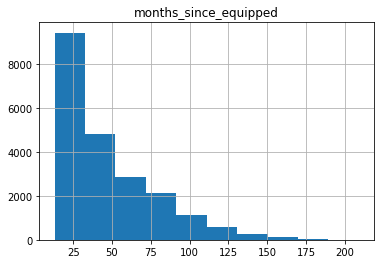

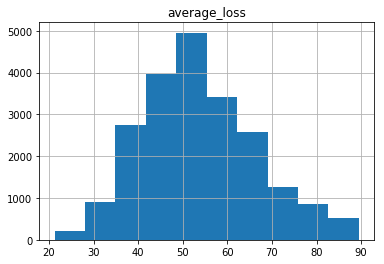

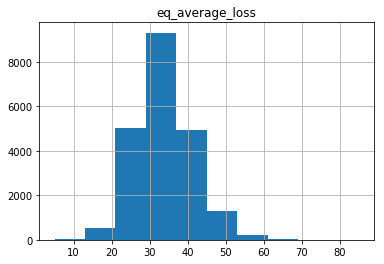

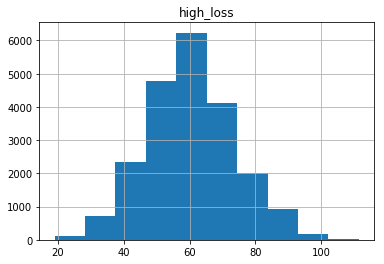

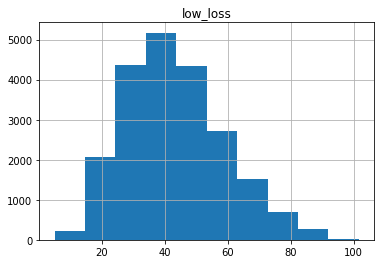

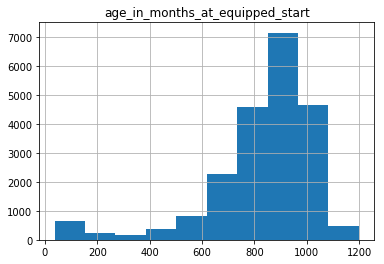

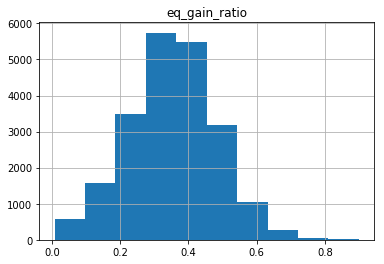

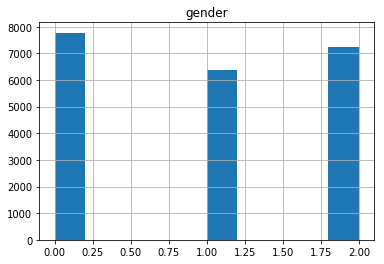

In [72]:
for feature in ['months_since_equipped', 'average_loss', 'eq_average_loss', 'high_loss', 'low_loss', 'age_in_months_at_equipped_start','eq_gain_ratio', 'gender']:
    display.display(equipment_success.hist(feature))

In [73]:
def scaleInner(df, feature):
    stats = df[feature].describe();
    std = stats['std']
    mean = stats['mean']
    df[feature + '_scaled'] = (df[feature] - mean)/std
    return df

def scale(df, features):
    scaledDf = df.copy()
    for feature in features:
        scaleInner(scaledDf, feature)
    return scaledDf        

In [74]:
def success_ratio(equipment_success, threshold):
    data = pd.value_counts(equipment_success['eq_average_loss'] < (equipment_success['average_loss']*.5 + threshold))
    return data[True]/(data[False] + data[True])

In [75]:
def model_good_prediction_ratio(targets, predictions, max_distance):
    predictionsDiff = (targets - predictions).apply (lambda x: abs(x))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [76]:
success_ratio(equipment_success, 5)

0.32146029074931054

In [77]:
tt = equipment_success['eq_average_loss']
model_good_prediction_ratio(tt, tt.describe()['mean'], 5)

0.550179965409246

In [78]:
def preprocess_features(df):
  """Prepares input features from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = scale(df, ['average_loss', 'high_loss', 'low_loss', 'age_in_months_at_equipped_start', 
                                 'freq_500', 'freq_1000', 'freq_2000', 'freq_4000', 'months_since_equipped'])
  selected_features = selected_features[
    ["age_in_months_at_equipped_start",
     "gender",
     "average_loss",
     "high_loss",
     "low_loss",
     "age_in_months_at_equipped_start_scaled",
     "average_loss_scaled",
     "high_loss_scaled",
     "low_loss_scaled",
     "freq_500_scaled",
     "freq_1000_scaled",
     "freq_2000_scaled",
     "freq_4000_scaled",
     "months_since_equipped_scaled",
     "freq_500",
      'freq_1000', 'freq_2000', 'freq_4000'
    ]]
  processed_features = selected_features


  #processed_features["buck_average_loss"] = bucketized_average_loss
  #processed_features['x1'] = processed_features['average_loss'] * processed_features['high_loss']
  #processed_features['x2'] = processed_features['average_loss'] * processed_features['low_loss']
  #processed_features['x3'] = processed_features['high_loss'] * processed_features['low_loss']
  #processed_features['x4'] = processed_features['average_loss'] * processed_features['months_since_equipped']
  #processed_features['x5'] = processed_features['average_loss'] * processed_features['age_in_months_at_equipped_start']
  #processed_features['x6'] = processed_features['average_loss'] ** 2
  #processed_features['x7'] = processed_features['months_since_equipped'] ** 2
  #processed_features['x8'] = processed_features['age_in_months_at_equipped_start'] ** 2
  
  return processed_features

def preprocess_targets(df):
  """Prepares target features (i.e., labels) from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  output_targets['eq_freq_500'] = df['eq_freq_500'] 
  output_targets['eq_freq_1000'] = df['eq_freq_1000'] 

  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2))
  #output_targets['target_reached'] = (df['eq_average_loss'] < df['average_loss']/2 + 5).astype('float')
    

  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2).apply (lambda x : max(x,0)))

  return output_targets

In [79]:
equipment_success = equipment_success.sample(frac=1)

In [82]:
total_samples = math.floor(equipment_success.count()['ears'] /3  )
examples = preprocess_features(equipment_success)
targets = preprocess_targets(equipment_success)

training_test_ratio = 0.8
training_samples = math.floor(total_samples*0.8)
validation_samples = total_samples - training_samples

[training_samples, validation_samples]

[5704, 1427]

In [83]:
examples.describe()

,age_in_months_at_equipped_start,gender,average_loss,high_loss,low_loss,age_in_months_at_equipped_start_scaled,average_loss_scaled,high_loss_scaled,low_loss_scaled,freq_500_scaled,freq_1000_scaled,freq_2000_scaled,freq_4000_scaled,months_since_equipped_scaled,freq_500,freq_1000,freq_2000,freq_4000
count,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0,21393.0
mean,832.0,1.0,53.6,60.6,43.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,42.6,48.9,57.6,65.3
std,206.5,0.8,12.9,13.3,15.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.1,16.1,14.4,15.5
min,37.0,0.0,21.2,19.0,5.0,-3.9,-2.5,-3.1,-2.4,-2.5,-2.7,-3.3,-4.2,-1.1,0.0,5.0,10.0,0.0
25%,763.0,0.0,45.0,51.7,31.2,-0.3,-0.7,-0.7,-0.8,-0.7,-0.5,-0.5,-0.7,-0.8,30.0,40.0,50.0,55.0
50%,882.0,1.0,52.5,60.0,41.2,0.2,-0.1,-0.0,-0.1,-0.2,0.1,-0.1,-0.0,-0.3,40.0,50.0,56.0,65.0
75%,963.0,2.0,61.2,69.2,53.0,0.6,0.6,0.6,0.6,0.7,0.7,0.5,0.6,0.5,55.0,60.0,65.0,75.0
max,1199.0,2.0,89.5,111.4,101.7,1.8,2.8,3.8,3.8,4.2,3.8,4.3,3.5,5.2,115.0,110.0,120.0,120.0


In [84]:
targets.describe()

,eq_freq_500,eq_freq_1000
count,21393.0,21393.0
mean,30.2,28.8
std,9.8,7.9
min,0.0,-5.0
25%,25.0,25.0
50%,30.0,30.0
75%,35.0,35.0
max,90.0,90.0


In [85]:
training_examples = examples.head(training_samples).copy()
training_examples.describe()

,age_in_months_at_equipped_start,gender,average_loss,high_loss,low_loss,age_in_months_at_equipped_start_scaled,average_loss_scaled,high_loss_scaled,low_loss_scaled,freq_500_scaled,freq_1000_scaled,freq_2000_scaled,freq_4000_scaled,months_since_equipped_scaled,freq_500,freq_1000,freq_2000,freq_4000
count,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0,5704.0
mean,832.2,1.0,53.8,60.7,43.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,49.1,57.8,65.3
std,206.4,0.8,12.9,13.4,15.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,16.1,14.5,15.7
min,38.0,0.0,21.2,19.0,5.0,-3.8,-2.5,-3.1,-2.4,-2.5,-2.7,-3.3,-4.2,-1.1,0.0,5.0,10.0,0.0
25%,764.0,0.0,45.0,52.0,32.0,-0.3,-0.7,-0.6,-0.7,-0.7,-0.5,-0.5,-0.7,-0.8,30.0,40.0,50.0,55.0
50%,885.0,1.0,52.5,60.0,41.2,0.3,-0.1,-0.0,-0.1,-0.2,0.1,0.2,-0.0,-0.3,40.0,50.0,60.0,65.0
75%,961.0,2.0,61.2,69.3,53.0,0.6,0.6,0.7,0.6,0.7,0.7,0.5,0.6,0.5,55.0,60.0,65.0,75.0
max,1172.0,2.0,88.8,111.4,101.0,1.6,2.7,3.8,3.7,4.2,3.2,4.3,3.5,5.0,115.0,100.0,120.0,120.0


In [86]:
validation_examples = examples.tail(validation_samples).copy()
validation_examples.describe()

,age_in_months_at_equipped_start,gender,average_loss,high_loss,low_loss,age_in_months_at_equipped_start_scaled,average_loss_scaled,high_loss_scaled,low_loss_scaled,freq_500_scaled,freq_1000_scaled,freq_2000_scaled,freq_4000_scaled,months_since_equipped_scaled,freq_500,freq_1000,freq_2000,freq_4000
count,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0,1427.0
mean,825.2,0.9,53.6,60.7,43.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,42.5,48.9,57.6,65.3
std,209.5,0.8,12.6,12.8,15.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,16.0,14.1,14.9
min,37.0,0.0,22.5,27.9,6.2,-3.9,-2.4,-2.5,-2.4,-2.2,-2.7,-3.3,-3.2,-1.1,5.0,5.0,10.0,15.0
25%,748.5,0.0,45.0,51.4,31.2,-0.4,-0.7,-0.7,-0.8,-0.7,-0.5,-0.5,-0.7,-0.8,30.0,40.0,50.0,55.0
50%,871.0,1.0,52.5,60.0,41.0,0.2,-0.1,-0.0,-0.1,-0.2,0.1,-0.1,-0.0,-0.3,40.0,50.0,56.0,65.0
75%,962.0,2.0,61.2,69.2,53.0,0.6,0.6,0.6,0.6,0.7,0.7,0.5,0.6,0.5,55.0,60.0,65.0,75.0
max,1198.0,2.0,89.5,106.4,91.7,1.8,2.8,3.4,3.1,3.1,2.9,3.6,3.5,5.2,95.0,95.0,110.0,120.0


In [87]:
training_targets = targets.head(training_samples)

In [88]:
validation_targets = targets.tail(validation_samples)

In [89]:
training_targets.describe()

,eq_freq_500,eq_freq_1000
count,5704.0,5704.0
mean,30.3,28.9
std,9.7,8.0
min,0.0,0.0
25%,25.0,25.0
50%,30.0,30.0
75%,35.0,35.0
max,90.0,90.0


In [90]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [91]:
def construct_feature_columns():
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  deafness_levels = [20, 40, 55, 70, 80, 90]

  age_in_months_at_equipped_start_scaled = tf.feature_column.numeric_column("age_in_months_at_equipped_start_scaled")
  average_loss_scaled = tf.feature_column.numeric_column("average_loss_scaled")
  high_loss_scaled = tf.feature_column.numeric_column("high_loss_scaled")
  low_loss_scaled = tf.feature_column.numeric_column("low_loss_scaled")
    
  months_since_equipped_scaled = tf.feature_column.numeric_column("months_since_equipped_scaled")


  average_loss = tf.feature_column.numeric_column("average_loss")
  bucketized_average_loss = tf.feature_column.bucketized_column(
    average_loss, boundaries=deafness_levels)

  high_loss = tf.feature_column.numeric_column("high_loss")
  bucketized_high_loss = tf.feature_column.bucketized_column(
    high_loss, boundaries=deafness_levels)

  low_loss = tf.feature_column.numeric_column("low_loss")
  bucketized_low_loss = tf.feature_column.bucketized_column(
    low_loss, boundaries=deafness_levels)

  gender =   tf.feature_column.numeric_column("gender")
    
  freq_500 = tf.feature_column.numeric_column("freq_500_scaled")
  freq_1000 = tf.feature_column.numeric_column("freq_1000_scaled")
  freq_2000 = tf.feature_column.numeric_column("freq_2000_scaled")
  freq_4000 = tf.feature_column.numeric_column("freq_4000_scaled")


  return set([
      #average_loss_scaled, high_loss_scaled, low_loss_scaled ,
      #gender,
      #months_since_equipped_scaled, 
      #age_in_months_at_equipped_start_scaled,
             freq_500,
      freq_1000, freq_2000, freq_4000
  ])
  # return set([average_loss_scaled, high_loss_scaled, low_loss_scaled, average_x_high_x_low, average_x_high, average_x_low, age_in_months_at_equipped_start_scaled])

In [92]:
def train_model(
    model_type,
    my_optimizer,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets,
    hidden_units=[]):
  """Trains a regression model of multiple features.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `Regressor` object trained on the training data.
  """

  validation_targets= validation_targets[[label]]
  training_targets = training_targets[[label]]

  periods = 10
  steps_per_period = steps / periods
  
  print('hidden_units: '+ str(hidden_units))

  #my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  #my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)

 # my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  if model_type == 'linear':
      regressor = tf.estimator.LinearRegressor(
          feature_columns=construct_feature_columns(),
          optimizer=my_optimizer)
  elif model_type == 'neural_net':
      regressor = tf.estimator.DNNRegressor(
          feature_columns=construct_feature_columns(),
          hidden_units=hidden_units,
          optimizer=my_optimizer)
  else:
    raise Exception('Invalid model type:' + model_type)
  
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      num_epochs=1, 
      shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets[label], 
      num_epochs=1, 
      shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return regressor, training_predictions, training_targets[label]

hidden_units: []
Training model...
RMSE (on training data):
  period 00 : 14.20
  period 01 : 9.68
  period 02 : 8.33
  period 03 : 7.85
  period 04 : 7.62
  period 05 : 7.62
  period 06 : 7.61
  period 07 : 7.66
  period 08 : 7.58
  period 09 : 7.81
Model training finished.


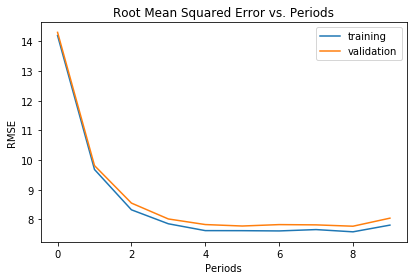

In [93]:
regressor, predictions, targets = train_model(
    model_type='linear',
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=3),
    steps=200,
    batch_size=10,
    label='eq_freq_500',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [97]:
[model_good_prediction_ratio(targets, predictions, 5), model_good_prediction_ratio(targets, training_targets.describe()['eq_freq_500']['mean'], 5)]


[0.5380434782608695, 0.39831697054698456]

In [95]:
training_targets.describe()

,eq_freq_500,eq_freq_1000
count,5704.0,5704.0
mean,30.3,28.9
std,9.7,8.0
min,0.0,0.0
25%,25.0,25.0
50%,30.0,30.0
75%,35.0,35.0
max,90.0,90.0


In [413]:
training_examples[0:10][[ 'freq_500',
      'freq_1000', 'freq_2000', 'freq_4000']].values

array([[55., 60., 70., 75.],
       [65., 70., 75., 90.],
       [40., 45., 60., 80.],
       [60., 55., 75., 80.],
       [80., 70., 80., 80.],
       [20., 30., 65., 75.],
       [30., 40., 60., 40.],
       [60., 65., 75., 85.],
       [25., 30., 35., 65.],
       [25., 35., 50., 60.]])

In [412]:
targets[0:10]

,eq_freq_500
39,55.0
25,35.0
74,40.0
75,40.0
43,30.0
4,20.0
0,25.0
2,40.0
13,25.0
3,25.0


In [96]:
predictions

array([25.944702, 25.464659, 27.100822, ..., 20.618061, 23.407784,
       30.631649], dtype=float32)

hidden_units: [1]
Training model...
RMSE (on training data):
  period 00 : 7.38
  period 01 : 7.05
  period 02 : 7.00
  period 03 : 6.96
  period 04 : 6.91
  period 05 : 6.90
  period 06 : 6.88
  period 07 : 6.88
  period 08 : 6.86
  period 09 : 6.85
Model training finished.


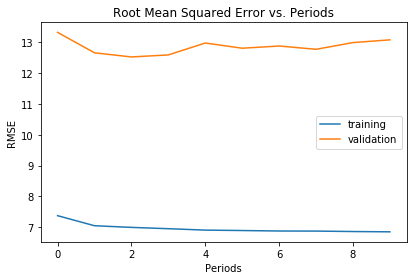

In [239]:
regressor, predictions, targets = train_model(
    model_type='neural_net',
    hidden_units=[1],
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=5),
    steps=1000,
    batch_size=20,
    label='eq_average_loss',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [240]:
[model_good_prediction_ratio(targets, predictions, 5), model_good_prediction_ratio(targets, training_targets.describe()['eq_average_loss']['mean'], 5)]

[0.6666666666666666, 0.5416666666666666]

In [436]:
training_targets.describe()

,eq_average_loss
count,6204.0
mean,34.2
std,7.8
min,5.0
25%,28.8
50%,33.8
75%,38.8
max,93.8


In [88]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras import optimizers

model = Sequential([
    Dense(4, input_dim=4),
    Activation('linear'),
    Dense(1),
])

#inputs = Input(shape=(4,))
#preds = Dense(4,activation='linear')(inputs)
#model = Model(inputs=inputs,outputs=preds)


sgd = optimizers.SGD()


model.compile(optimizer=sgd,
              loss='mse',       
              metrics=['mse'])  

features = [
    #'age_in_months_at_equipped_start',
    #'gender', 
                      'freq_500_scaled',
    'freq_1000_scaled',
    'freq_2000_scaled', 
    'freq_4000_scaled']
                         
data = (training_examples[features].values)
labels = (training_targets['eq_freq_500'].values)

validation_data = validation_examples[features].values
validation_labels = validation_targets.values
model.fit(data, labels, epochs=10, batch_size=10,
          validation_data=(data, labels))

Train on 15 samples, validate on 15 samples
Epoch 1/10
15/15 [==============================] - 1s 48ms/step - loss: 1625.6941 - mean_squared_error: 1625.6941 - val_loss: 1229.9455 - val_mean_squared_error: 1229.9455
Epoch 2/10
15/15 [==============================] - 0s 627us/step - loss: 1096.4830 - mean_squared_error: 1096.4830 - val_loss: 234.0816 - val_mean_squared_error: 234.0816
Epoch 3/10
15/15 [==============================] - 0s 691us/step - loss: 180.1237 - mean_squared_error: 180.1237 - val_loss: 130.1534 - val_mean_squared_error: 130.1534
Epoch 4/10
15/15 [==============================] - 0s 722us/step - loss: 81.7067 - mean_squared_error: 81.7067 - val_loss: 635.5946 - val_mean_squared_error: 635.5946
Epoch 5/10
15/15 [==============================] - 0s 1ms/step - loss: 548.2599 - mean_squared_error: 548.2599 - val_loss: 155.7111 - val_mean_squared_error: 155.7111
Epoch 6/10
15/15 [==============================] - 0s 604us/step - loss: 299.7099 - mean_squared_error: 

In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sgd=keras.optimizers.SGD()


model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=sgd,
              loss='mse',)

model = Model(inputs=)

# Generate dummy data
import numpy as np
data = np.random.random((10, 2))
labels = np.random.randint(2, size=(10, 1))

data = sc.fit_transform(np.asarray([[1.,2.], [3., 4.], [5., 6.]]))
labels =  sc.fit_transform(np.asarray([1.5,3.5, 5.5]))

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=2, verbose=1)

ValueError: Expected 2D array, got 1D array instead:
array=[1.5 3.5 5.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Epoch 1/10
3/3 [==============================] - 0s 148ms/step - loss: 4.3451
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1068
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0223
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.4970
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.1197
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0110


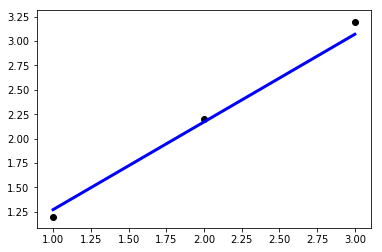

In [75]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd = optimizers.SGD()
x = np.asarray([1., 2., 3.])
y = np.asarray([1.2, 2.2, 3.2])
model.compile(optimizer=sgd ,loss='mse')
model.fit(x,y, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x,y,color='black')
plt.plot(x,model.predict(x), color='blue', linewidth=3)

In [58]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets[label], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets[label], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[label], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.3f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

In [67]:
data = sc.fit_transform(np.asarray([[1.,2.], [3., 4.], [5., 6.]]))

data

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

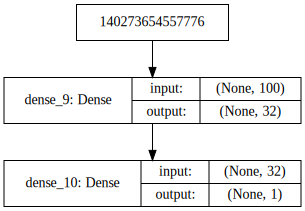

In [42]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

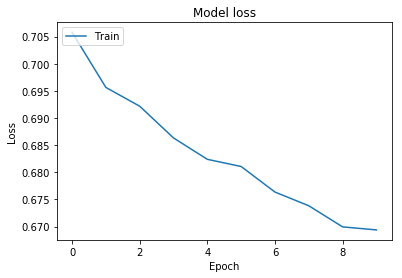

In [40]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [89]:
predictions = model.predict(data).transpose()[0]
labels.shape

(15,)

In [90]:
predictions

array([57.18226 , 60.39943 , 34.68806 , 38.720654, 34.9676  , 33.093513,
       52.8726  , 37.540504, 49.13037 , 48.229763, 45.001083, 62.197365,
       35.119717, 46.7436  , 48.34389 ], dtype=float32)

In [431]:
data

array([[55., 60., 70., 75.],
       [65., 70., 75., 90.],
       [40., 45., 60., 80.],
       [60., 55., 75., 80.],
       [80., 70., 80., 80.],
       [20., 30., 65., 75.],
       [30., 40., 60., 40.],
       [60., 65., 75., 85.],
       [25., 30., 35., 65.],
       [25., 35., 50., 60.],
       [30., 60., 60., 85.],
       [60., 50., 65., 75.],
       [35., 45., 65., 65.],
       [65., 60., 65., 60.],
       [45., 45., 40., 60.]])

In [92]:
labels -predictions

array([ -2.18225861, -30.39942932,   5.31193924,  -8.72065353,
        -9.96760178,   1.90648651,  -7.87260056,   2.45949554,
       -14.13037109,   6.77023697,  -5.00108337,  -7.19736481,
       -10.11971664,  -6.74359894,  -3.34389114])

In [36]:
map(labels - predictions, lambda x: abs(x))
1

TypeError: 'function' object is not iterable

In [ ]:
def model_good_prediction_ratio_array(targets, predictions, max_distance):
    predictionsDiff = (targets - predictions) (lambda x: abs(x))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [516]:
[model_good_prediction_ratio_array(labels, result, 5), model_good_prediction_ratio(targets, training_targets.describe()['eq_average_loss']['mean'], 5)]

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

Training model...
LogLoss (on training data):
  period 00 : 0.530
  period 01 : 0.519
  period 02 : 0.518
  period 03 : 0.517
  period 04 : 0.517
  period 05 : 0.517
  period 06 : 0.517
  period 07 : 0.517
  period 08 : 0.517
  period 09 : 0.517
Model training finished.


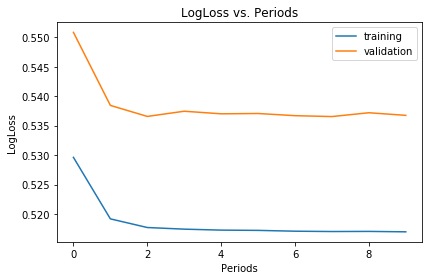

In [293]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.0005,
    steps=600,
    batch_size=200,
    label='target_reached',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [294]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["target_reached"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])
evaluation_metrics

AUC on the validation set: 0.71
Accuracy on the validation set: 0.75


{'accuracy': 0.7485549,
 'accuracy_baseline': 0.7138728,
 'auc': 0.7140829,
 'auc_precision_recall': 0.5333876,
 'average_loss': 0.5367404,
 'global_step': 600,
 'label/mean': 0.28612718,
 'loss': 0.5367404,
 'precision': 0.6090909,
 'prediction/mean': 0.30263147,
 'recall': 0.33838382}

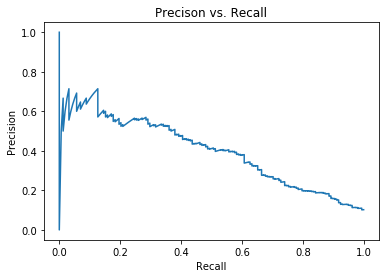

In [213]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

precision, recall, thresholds = metrics.precision_recall_curve(
    validation_targets, validation_probabilities)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precison vs. Recall")
_ = plt.show()

In [217]:
validation_probabilities

array([0.06635913, 0.02331385, 0.01645223, ..., 0.15750562, 0.01856546,
       0.07513855], dtype=float32)

In [242]:
validation_targets['target_reached'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [241]:
pd.value_counts(validation_targets['target_reached'])

0.0    1495
1.0     158
Name: target_reached, dtype: int64

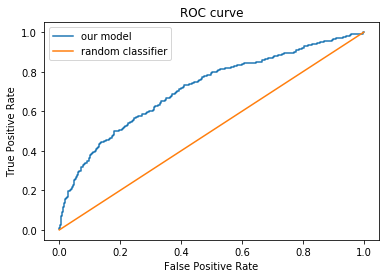

In [295]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
_ = plt.legend(loc=2)

In [27]:
 predict_training_input_fn = lambda: my_input_fn(
  training_examples, 
  training_targets['eq_average_loss'], 
  num_epochs=1, 
  shuffle=False)
    
training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
training_predictions = np.array([item['predictions'][0] for item in training_predictions])

training_predictions

array([33.161465, 32.640793, 37.437405, ..., 32.65567 , 34.765648,
       33.240456], dtype=float32)

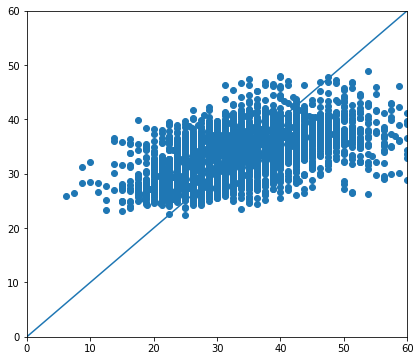

In [685]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
plt.ylim(0, 60)
plt.xlim(0, 60)
plt.plot([0, 60], [0, 60], label="random classifier")

plt.scatter(targets, predictions )

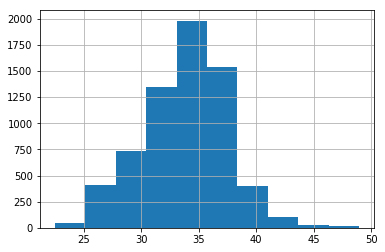

In [686]:
pd.DataFrame({'x': predictions})['x'].hist()

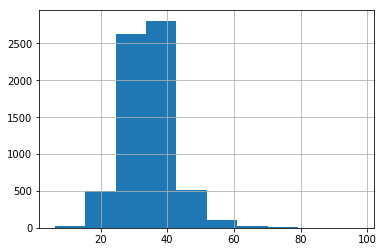

In [669]:
pd.DataFrame({'x': targets})['x'].hist()

In [689]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].describe()

count   6611.0
mean       4.7
std        4.6
min        0.0
25%        1.7
50%        3.5
75%        6.4
max       61.7
Name: x, dtype: float64

In [358]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].describe()

ValueError: If using all scalar values, you must pass an index

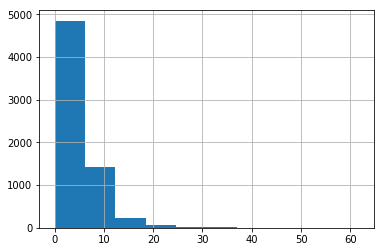

In [691]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].hist()

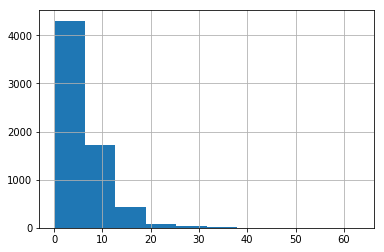

In [692]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].hist()